# Lecture 18: Evolutionary invasion analysis

## Lecture overview

1. [Invasion fitness](#section1)
2. [Evolutionarily singular strategies](#section2)
3. [Evolutionarily stable strategies](#section3)
4. [Evolutionary convergence](#section4)
5. [Pairwise invasibility plots](#section5)

In the models we've discussed so far we've taken the parameters to be fixed. In reality, many of these parameters can evolve. For example, in our model of exponential growth in discrete time, $n(t+1)=n(t) R$, we took $R$ to be the same for all individuals for all time. But any mutation causing a larger $R$ would increase in frequency, causing the value of $R$ to increase over time. In this lecture we'll explore how to determine the direction of evolution and the stability of evolutionary endpoints for more complex models using a technique called <b>evolutionary invasion analysis</b> (also known as adaptive dynamics).

The idea:

  - determine which parameter(s) of our model an evolving trait affects
  - take the population to be fixed for some "resident" trait value
  - determine the equilibria and stability of the system with only the resident trait
  - derive the growth rate of a new individual with a "mutant" trait value
  - ask when the mutant trait value will invade
  - look for potential evolutionary endpoints
  - determine the stability of those endpoints

!!! note "The evolution of dispersal"

    To motivate evolutionary invasion analysis, let's consider the evolution of dispersal. 
    
    Imagine there are $S$ sites, with a most one individual reproducing at each. We census the population at the time of reproduction. A reproducing individual has a large number $B$ offspring and then dies. A fraction $d$ of those offspring disperse and a fraction $1-c$ of those survive. The survivors then equally divided among all sites. One individual in each site is then chosen at random to reproduce, which begins the life-cycle anew.
    
    The question is, how should dispersal, $d$, evolve? There is a cost, $c$, which selects against dispersal but dispersal also allows offspring to avoid competiting with their kin, which could select for more dispersal. We'll use evolutionary invasion analysis to sort this out.

<span id='section1'></span>
## 1. Invasion fitness
<hr>

Let's think about this analysis very generally (in discrete time).

Let the number of individuals with the resident trait value be $n$ and the number of individuals with the mutant trait value $n_m$. (And we'll assume asexual reproduction for simplicity, so that residents produce residents and mutant produce mutants.)
Let the potentially nonlinear dynamics of these two groups of individuals depend on their respective trait values, $z$ and $z_m$,

$$
\begin{aligned}
n(t+1) &= n(t) R(n(t), n_m(t), z, z_m)\\
n_m(t+1) &= n_m(t) R_m(n(t), n_m(t), z, z_m)
\end{aligned}
$$

The Jacobian of this system is

$$
\begin{aligned}
\mathbf{J} &= 
\begin{pmatrix}
\frac{\mathrm{d}n(t+1)}{\mathrm{d}n(t)} & \frac{\mathrm{d}n(t+1)}{\mathrm{d}n_m(t)} \\
\frac{\mathrm{d}n_m(t+1)}{\mathrm{d}n(t)} & \frac{\mathrm{d}n_m(t+1)}{\mathrm{d}n_m(t)} 
\end{pmatrix}
\end{aligned}
$$

Now consider some non-zero resident equilibrium, $\hat{n}>0$, without the mutant, $\hat{n}_m=0$.
Assuming that the resident does not produce mutants, $\frac{\mathrm{d}n_m(t+1)}{\mathrm{d}n(t)}\big|_{n_m=0}=0$,
the Jacobian evaluated at this equilibrium simplifies to

$$
\begin{aligned}
\mathbf{J}\big|_{n_m=0,n=\hat{n}} &= 
\begin{pmatrix}
\frac{\mathrm{d}n(t+1)}{\mathrm{d}n(t)} & \frac{\mathrm{d}n(t+1)}{\mathrm{d}n_m(t)} \\
0 & \frac{\mathrm{d}n_m(t+1)}{\mathrm{d}n_m(t)} 
\end{pmatrix}_{n_m=0,n=\hat{n}}
\end{aligned}
$$

We can immediately see that the two eigenvalues of this upper triangular matrix are

$$
\begin{aligned}
\lambda_1 &= \frac{\mathrm{d}n(t+1)}{\mathrm{d}n(t)}\bigg|_{n_m=0,n=\hat{n}}\\
\lambda_2 &= \frac{\mathrm{d}n_m(t+1)}{\mathrm{d}n_m(t)}\bigg|_{n_m=0,n=\hat{n}}
\end{aligned}
$$

The first, $\lambda_1$, determines whether the resident equilibrium, $\hat{n}>0$, is stable in the absence of mutants. We'll take $0 < \lambda_1 < 1$ as a given (we're only interested in stable resident equilibria, we can disregard the others).

The second, $\lambda_2$, determines whether the resident equilibrium is stable in the presence of a small number of mutants. We call $\lambda_2$ the **invasion fitness**, $\lambda(z_m,z)$. The mutant will invade whenever $\lambda(z_m,z) > 1$.

In some simple cases we might be able to use the invasion criterium, $\lambda(z_m,z)>1$, to determine what values of $z_m$ (relative to $z$) can invade. In most cases, however, $\lambda(z_m,z)$ will be complex enough that this will not be possible, so we rely on a simple approximation.

!!! note "The evolution of dispersal"

    Let a fraction $d$ of the resident offspring disperse and a fraction $d_m$ of the mutant offspring disperse. And let there be $n(t)$ residents, $n_m(t)$ mutants, and $S-n(t)-n_m(t)\geq0$ empty sites. Then the probability a resident offspring replaces a resident is the number of resident offspring in a resident patch divided by the total number of offspring in that patch,

    $$
    \begin{aligned}
    p_{rr} &= \frac{B(1-d) + (n(t)-1)Bd(1-c)/S}{B(1-d) + (n(t)-1)Bd(1-c)/S + n_m(t)Bd_m(1-c)/S}\\
    &= \frac{S(1-d) + (n(t)-1)d(1-c)}{S(1-d) + (n(t)-1)d(1-c) + n_m(t)d_m(1-c)}
    \end{aligned}
    $$

    Here $B(1-d)$ is the number of non-dispersing offspring produced by the resident in that patch, $(n(t)-1)Bd(1-c)/S$ is the number of resident offspring dispersing to the patch from elsewhere, and $n_m(t)Bd_m(1-c)/S$ is the number of mutant offspring dispersing to the patch. The probability that a mutant offspring replaces a mutant $p_{mm}$ is the same expression with $d$ and $d_m$ and $n$ and $n_m$ exchanged. The probability that a resident offspring wins an empty patch is 

    $$
    \begin{aligned}
    p_{re} &= \frac{n(t)Bd(1-c)}{n(t)Bd(1-c) + n_m(t)Bd_m(1-c)}\\
    &= \frac{n(t)d}{n(t)d + n_m(t)d_m}
    \end{aligned}
    $$
    
    Then the number of resident and mutant individuals in the next generation are

    $$
    \begin{aligned}
    n(t+1) &= n(t) p_{rr} + n_m(t) (1 - p_{mm}) + (S - n(t) - n_m(t)) p_{re}\\
    n_m(t+1) &= n(t) (1-p_{rr}) + n_m(t) p_{mm} + (S - n(t) - n_m(t)) (1-p_{re})
    \end{aligned}
    $$    

    Now consider an equilibrium with no mutants, $\hat{n}_m=0$. Setting $n(t+1) = n(t) = \hat{n}$ gives $\hat{n}=S$.

    We determine the stability of this equilibrium with the Jacobian. From the general analysis above we know the two eigenvalues are

    $$
    \begin{aligned}
    \lambda_1 &= \frac{\mathrm{d}n(t+1)}{\mathrm{d}n(t)}\bigg|_{n_m=0,n=S} = 0\\
    \lambda_2 &= \frac{\mathrm{d}n_m(t+1)}{\mathrm{d}n_m(t)}\bigg|_{n_m=0,n=S} = \frac{1-d_m}{1-d_m + d(1-c)} + \frac{d_m(1-c)}{1-d + d(1-c)}
    \end{aligned}
    $$

    The first eigenvalue is less than 1 in absolute value, meaning the resident equilibrium is stable. The second eigenvalue is our invasion fitness

    $$
    \lambda(d_m,d) = \frac{1-d_m}{1-d_m + d(1-c)} + \frac{d_m(1-c)}{1-d + d(1-c)}
    $$

    In this relatively simple example, we can determine exactly what mutant trait values can invade by looking at where

    $$
    \lambda(d_m,d) - 1 = \frac{(1-c)(d_m-d)(1-cd-d_m)}{(1-cd)(1-d_m+d(1-c))}
    $$

    is positive. The sign of $\lambda(d_m,d) - 1$ is the sign of $(d_m-d)(1-cd-d_m)$. So the mutant will invade if both terms are positive $d<d_m<1-cd$ or both terms are negative $1-cd<d_m<d$. In either case, the mutant will invade when it has a trait value between $1-cd$ and $d$.

<span id='section2'></span>
## 2. Evolutionarily singular strategies
<hr>

When the mutant trait value is very close to the resident trait value, we can approximate invasion fitness with a Taylor series around $z_m = z$

$$
\begin{aligned}
\lambda(z_m,z) &\approx \lambda(z,z) + \frac{\partial \lambda}{\partial z_m}\bigg|_{z_m=z} (z_m-z)\\
&= 1 + \frac{\partial \lambda}{\partial z_m}\bigg|_{z_m=z} (z_m-z)
\end{aligned}
$$

This allows us to determine which direction evolution will proceed from the current resident value:

- if $\frac{\partial \lambda}{\partial z_m}\Big|_{z_m=z}>0$ then invasion when $z_m>z$
- if $\frac{\partial \lambda}{\partial z_m}\Big|_{z_m=z}<0$ then invasion when $z_m<z$

The direction of evolution by small steps is given by $\frac{\partial \lambda}{\partial z_m}\Big|_{z_m=z}$, which we call the **selection gradient**.

Potential evolutionary endpoints, also called **evolutionarily singular strategies**, are the resident trait values $z=\hat{z}$ where there is no directional selection

$$
\frac{\partial \lambda}{\partial z_m}\bigg|_{z_m=\hat{z}, z=\hat{z}} = 0
$$

!!! note "The evolution of dispersal"

    The selection gradient is

    $$
    \frac{\partial \lambda}{\partial d_m}\Big|_{d_m=d} = \frac{(1-d-dc))(1-c)}{(1-cd)^2}
    $$

    The sign of this is the sign of 1-d-dc, meaning the dispersal rate will increase whenever d<1/(1+c) and decrease whenever 1/(1+c)<d. Setting the selection gradient to zero and solving for the evolutionarily singular strategy gives $\hat{d} = 1/(1+c)$.

<span id='section3'></span>
## 3. Evolutionarily stable strategies
<hr>

An evolutionarily singular strategy, $\hat{z}$, will only be an **evolutionarily stable strategy** (ESS), $z^*$, if it cannot be invaded.

Global evolutionary stability will be impossible to prove for most models and so we often focus on *local* stability, which requires that $\lambda(z_m,z)|_{z=\hat{z}}$ is concave at $z_m=\hat{z}$ (i.e., $\hat{z}$ is a local fitness maximum),

$$
\frac{\partial^2 \lambda}{\partial z_m^2}\bigg|_{z_m=\hat{z}, z=\hat{z}} < 0
$$

!!! note "The evolution of dispersal"

    The second derivative of invasion fitness with respect to the mutant trait value evalulated at the singular strategy is

    $$
    \frac{\partial^2 \lambda}{\partial d_m^2}\Big|_{d_m=d=\hat{d}} = -2(1-c)(1+c)^2
    $$

    Because $0<c<1$ this is always negative, which means the singular strategy is always evolutionarily stable.

<span id='section4'></span>
## 4. Evolutionary convergence
<hr>

There is one more characteristic of evolutionarily singular strategies that we care about, and
that is whether evolution actually leads to that strategy or not. For evolution to move the trait value towards a singular strategy, $\hat{z}$, we need evolution to increase the trait value when it is less than $\hat{z}$ and decrease the trait value when it is greater than $\hat{z}$. In other words, we need the selection gradient $\frac{\partial \lambda}{\partial z_m}\Big|_{z_m=z}$ to decrease as we move through $z=\hat{z}$

$$
\frac{\mathrm{d}}{\mathrm{d} z}\left( \frac{\partial \lambda}{\partial z_m}\Big|_{z_m=z} \right)_{z=\hat{z}} < 0
$$

Singular strategies that satisfy this criteria are said to be **convergence stable**. 

Interestingly, not all evolutionarily stable strategies are convergence stable and not all convergence stable singular strategies are evolutionarily stable! Evolutionarily stable strategies that are not convergence stable are called **Garden of Eden strategies**. Singular strategies that are convergence stable but not evolutionarily stable are called **evolutionary branching points**. The latter are of particular interest because the system evolves towards a state where multiple strategies can invade and coexist, leading to diversification.

!!! note "The evolution of dispersal"

    The derivative of the selection gradient evaluated at the singular strategy is

    $$
    \frac{\mathrm{d}}{\mathrm{d} d}\left( \frac{\partial \lambda}{\partial d_m}\Big|_{d_m=d} \right)_{d=\hat{d}} = -(1-c)(1+c)^3
    $$

    Because $0<c<1$ this is always negative, which means the singular strategy is always convergence stable.

<span id='section5'></span>
## 5. Pairwise invasibility plots
<hr>

A helpful way to visualize the two types of stability of an evolutionarily singular strategy is called a **pairwise invasibility plot** (PIP). In this plot we have the resident trait value $z$ on the x-axis, the mutant trait value $z_m$ on the y-axis, and we color in the regions where the mutant can invade, $\lambda(z_m,z)>1$.

The four types of evolutionarily singular strategies $\hat{z}$ are then represented by the following PIPs

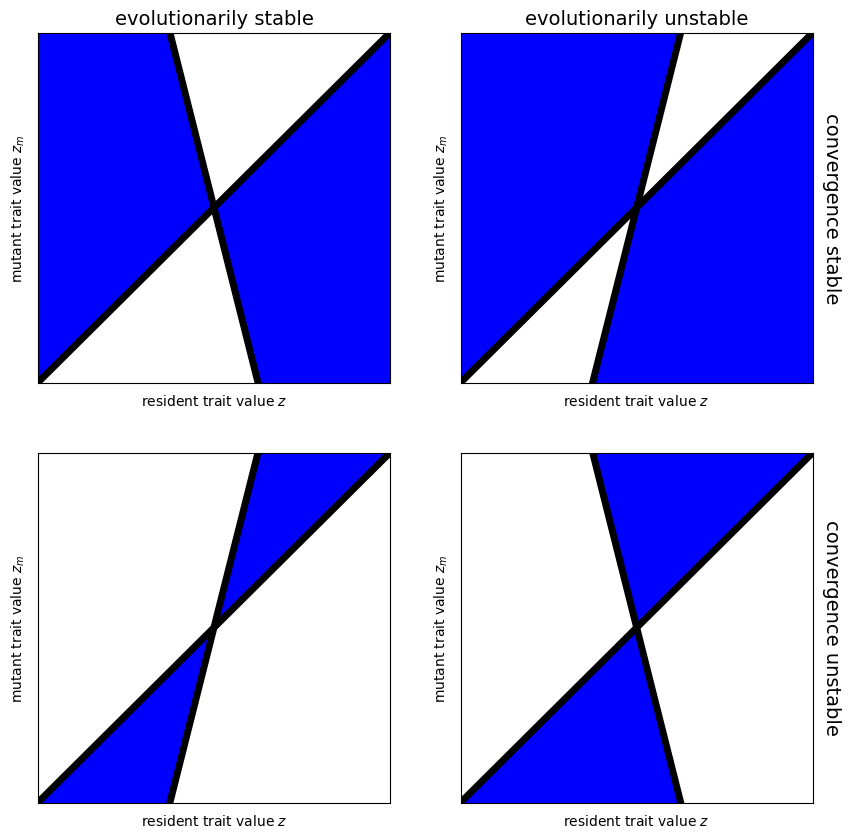

In [77]:
import numpy as np
from matplotlib import pyplot as plt

# dummy invasion fitness
def inv(x, y, slope, z=1):
    if y < x:
      if y > slope * x:
        return z
    if y > x:
      if y < slope * x:
        return z
    return 1-z

# evaluate
def compute_pip(slope=-2,z=1,xmin=-2,xmax=2,steps=100):
    xs = np.linspace(xmin,xmax,steps)
    X,Y = np.meshgrid(xs,xs) # X and Y values
    # store the invasion success in a matrix
    PIP = []
    for y in xs:
      row = []
      for x in xs:
        row.append(inv(x,y,slope,z))
      PIP.append(row)
    return X,Y,PIP

# plot
def plotfun(X,Y,Z,slope=1,ax=None):
    if ax==None:
      fig, ax=plt.subplots(1,1,figsize=(5,5))
    ax.contourf(X,Y,Z, colors=['white','black','blue','black'])
    ax.plot(X[0],X[0],'k',lw=5)
    ax.plot(X[0],X[0]*slope,'k',lw=5)
    ax.set_xlim(min(X[0]),max(X[0]))
    ax.set_ylim(min(X[0]),max(X[0]))
    ax.set_xlabel('resident trait value $z$')
    ax.set_ylabel('mutant trait value $z_m$')
    ax.set_xticks([])
    ax.set_yticks([])

fig, axs = plt.subplots(2,2,figsize=(10,10))
X,Y,Z = compute_pip(slope=-4,z=1)
plotfun(X,Y,Z,slope=-4,ax=axs[0][0])
axs[0][0].set_title('evolutionarily stable',fontsize=14)
axs[0][1].text(2.1,0,'convergence stable',fontsize=14,rotation=270,verticalalignment='center')
X,Y,Z = compute_pip(slope=4,z=0)
plotfun(X,Y,Z,slope=4,ax=axs[0][1])
axs[0][1].set_title('evolutionarily unstable',fontsize=14)
X,Y,Z = compute_pip(slope=4,z=1)
plotfun(X,Y,Z,slope=4,ax=axs[1][0])
axs[1][1].text(2.1,0,'convergence unstable',fontsize=14,rotation=270,verticalalignment='center')
X,Y,Z = compute_pip(slope=-4,z=0)
plotfun(X,Y,Z,slope=-4,ax=axs[1][1])

We can read a PIP by choosing a resident trait value (a point on the x-axis) and looking to see what mutant trait values can invade it (blue regions in that vertical slice). Choose one of the possible invading trait values and set this to be the new resident trait value. Continue indefinitely. 

When we assume mutants have trait values close to the resident, we restrict ourselves to moving along the 1:1 line. Then, we move to the right when there is blue directly above the 1:1 line but not below and we move to the left when there is blue directly below the 1:1 line but not above. Where there is blue directly above and below the 1:1 we are at a singular strategy that is a fitness minimum (it can be invaded in both directions). Where there is white directly above and below the 1:1 we are at a singular strategy that is a fitness maximum (it can't be invaded in either direction).

Try reading each of the plots above. Prove to yourself that the top left has a convergence stable evolutionarily stable strategy, the top right has a branching point, the bottom left has a has a Garden of Eden, and the bottom right has an invasible repellor (a fitness minimum that is not convergence stable).

!!! note "The evolution of dispersal"

    In our model of the evolution of dispersal, the singular strategy is always evolutionarily and convgence stable, and the PIP is below.

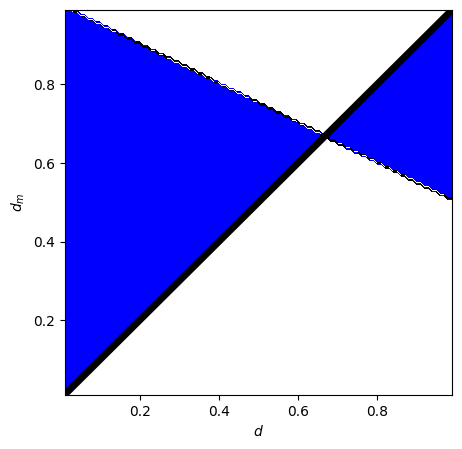

In [16]:
import numpy as np
from matplotlib import pyplot as plt

# invasion fitness
def inv_fun(dm,d,c):
    invasionfitness = (1-dm)/(1-dm + d*(1-c)) + (dm*(1-c))/(1-d + d*(1-c))
    if invasionfitness>1:
        return 1 # return 1 if mutant invades
    return 0 # return 0 if mutant does not invade

# evaluate
def compute_pip(c=0.5,dmin=0.01,dmax=0.99,steps=100):
    ds = np.linspace(dmin,dmax,steps)
    X,Y = np.meshgrid(ds,ds) # X and Y values
    # store the invasion success in a matrix
    PIP = []
    for dm in ds:
      row = []
      for d in ds:
        row.append(inv_fun(dm,d,c))
      PIP.append(row)
    return X,Y,PIP

# plot
def plotfun(X,Y,Z):
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    ax.set_xlabel('$d$')
    ax.set_ylabel('$d_m$')
    ax.contourf(X,Y,Z, colors=['white','black','blue','black'])
    ax.plot(X[0],X[0],'k',lw=5)

X,Y,Z=compute_pip()
plotfun(X,Y,Z)